<a href="https://colab.research.google.com/github/victoriapicodiaz/portfolio-ia/blob/main/Tarea6IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FASE 2


In [1]:
# === IMPORTS BÁSICOS PARA EMPEZAR ===
import pandas as pd
import numpy as np

print("Iniciando análisis de Mall Customer Segmentation Dataset")
print("Pandas y NumPy cargados - listos para trabajar con datos")


Iniciando análisis de Mall Customer Segmentation Dataset
Pandas y NumPy cargados - listos para trabajar con datos


In [2]:

url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv"

df_customers = pd.read_csv(url)
print("Dataset cargado con éxito")


Dataset cargado con éxito


In [3]:
print("INFORMACIÓN DEL DATASET:")
print(f"Shape: {df_customers.shape[0]} filas, {df_customers.shape[1]} columnas")
print(f"Columnas: {list(df_customers.columns)}")
print(f"Memoria: {df_customers.memory_usage(deep=True).sum() / 1024:.1f} KB")

print(f"\nPRIMERAS 5 FILAS:")
df_customers.head()


INFORMACIÓN DEL DATASET:
Shape: 200 filas, 5 columnas
Columnas: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Memoria: 16.9 KB

PRIMERAS 5 FILAS:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# === ANÁLISIS DE TIPOS Y ESTRUCTURA ===
print("INFORMACIÓN DETALLADA DE COLUMNAS:")
print(df_customers.info())

print(f"\nESTADÍSTICAS DESCRIPTIVAS:")
df_customers.describe()


INFORMACIÓN DETALLADA DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

ESTADÍSTICAS DESCRIPTIVAS:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# === ANÁLISIS DE GÉNERO ===
print("DISTRIBUCIÓN POR GÉNERO:")
gender_counts = df_customers['Genre'].value_counts()
print(gender_counts)

print(f"\nPorcentajes:")
for gender, count in gender_counts.items():
    pct = (count / len(df_customers) * 100)
    print(f"   {gender}: {pct:.1f}%")


DISTRIBUCIÓN POR GÉNERO:
Genre
Female    112
Male       88
Name: count, dtype: int64

Porcentajes:
   Female: 56.0%
   Male: 44.0%


In [6]:
# === ESTADÍSTICAS DE VARIABLES DE SEGMENTACIÓN ===
numeric_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("ESTADÍSTICAS CLAVE:")
print(df_customers[numeric_vars].describe().round(2))

print(f"\nRANGOS OBSERVADOS:")
for var in numeric_vars:
    min_val, max_val = df_customers[var].min(), df_customers[var].max()
    mean_val = df_customers[var].mean()
    print(f"   {var}: {min_val:.0f} - {max_val:.0f} (promedio: {mean_val:.1f})")


ESTADÍSTICAS CLAVE:
          Age  Annual Income (k$)  Spending Score (1-100)
count  200.00              200.00                  200.00
mean    38.85               60.56                   50.20
std     13.97               26.26                   25.82
min     18.00               15.00                    1.00
25%     28.75               41.50                   34.75
50%     36.00               61.50                   50.00
75%     49.00               78.00                   73.00
max     70.00              137.00                   99.00

RANGOS OBSERVADOS:
   Age: 18 - 70 (promedio: 38.9)
   Annual Income (k$): 15 - 137 (promedio: 60.6)
   Spending Score (1-100): 1 - 99 (promedio: 50.2)


In [7]:
# === DETECCIÓN DE OUTLIERS USANDO IQR ===
print("DETECCIÓN DE OUTLIERS:")

outlier_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in outlier_cols:
    Q1 = df_customers[col].quantile(0.25)
    Q3 = df_customers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Encontrar outliers
    outliers = df_customers[(df_customers[col] < lower_bound) |
                           (df_customers[col] > upper_bound)]

    print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df_customers)*100:.1f}%)")
    print(f"      Límites normales: {lower_bound:.1f} - {upper_bound:.1f}")


DETECCIÓN DE OUTLIERS:
   Age: 0 outliers (0.0%)
      Límites normales: -1.6 - 79.4
   Annual Income (k$): 2 outliers (1.0%)
      Límites normales: -13.2 - 132.8
   Spending Score (1-100): 0 outliers (0.0%)
      Límites normales: -22.6 - 130.4


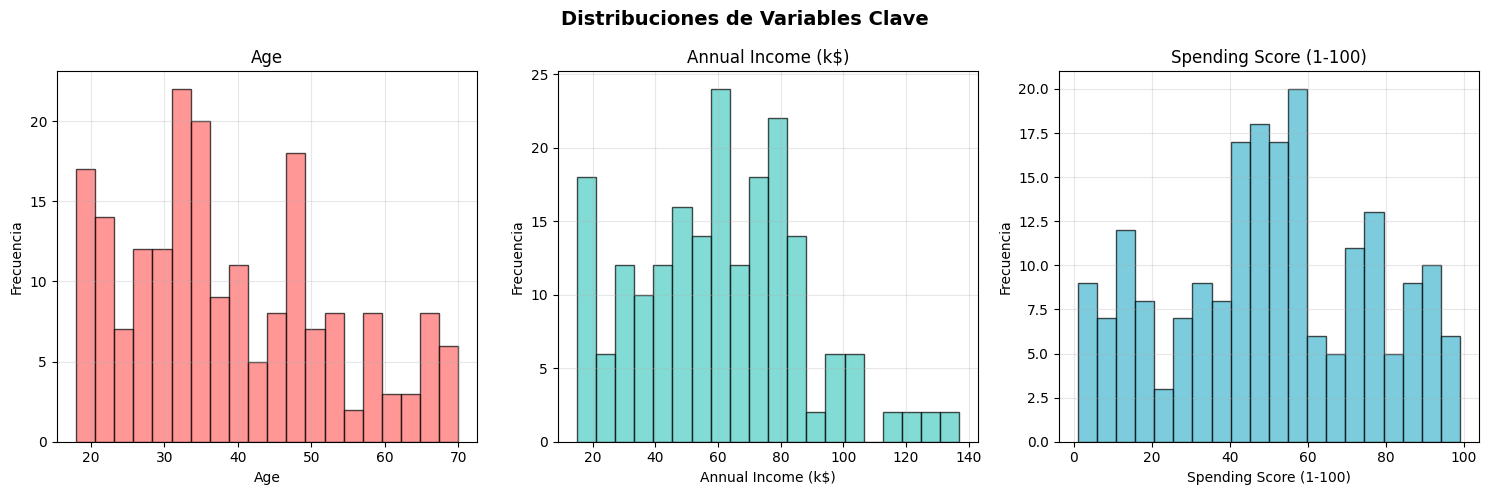

In [8]:
# === IMPORTS PARA VISUALIZACIÓN ===
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# === HISTOGRAMAS DE VARIABLES PRINCIPALES ===
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribuciones de Variables Clave', fontsize=14, fontweight='bold')

vars_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (var, color) in enumerate(zip(vars_to_plot, colors)):
    axes[i].hist(df_customers[var], bins=20, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


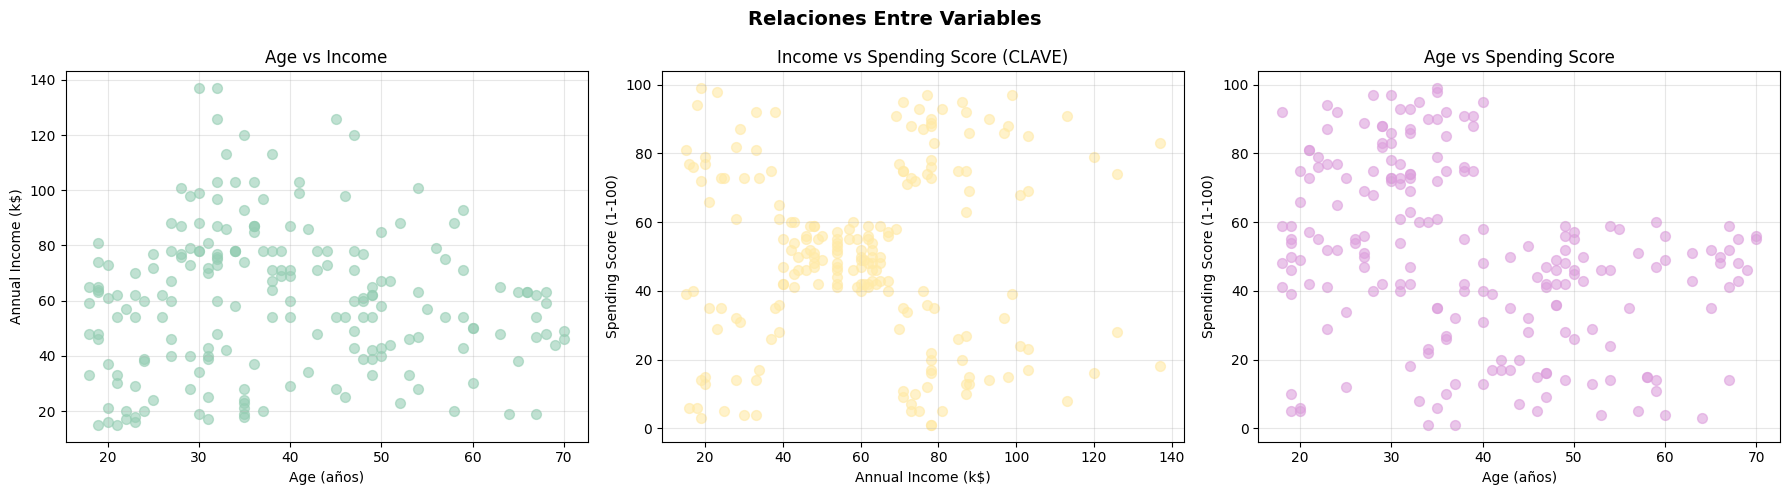

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relaciones Entre Variables', fontsize=14, fontweight='bold')

# Age vs Income
axes[0].scatter(df_customers['Age'], df_customers['Annual Income (k$)'],
                alpha=0.6, color='#96CEB4', s=50)
axes[0].set_xlabel('Age (años)')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_title('Age vs Income')
axes[0].grid(True, alpha=0.3)

# Income vs Spending Score ⭐ CLAVE PARA SEGMENTACIÓN
axes[1].scatter(df_customers['Annual Income (k$)'], df_customers['Spending Score (1-100)'],
                alpha=0.6, color='#FFEAA7', s=50)
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Income vs Spending Score (CLAVE)')
axes[1].grid(True, alpha=0.3)

# Age vs Spending Score
axes[2].scatter(df_customers['Age'], df_customers['Spending Score (1-100)'],
                alpha=0.6, color='#DDA0DD', s=50)
axes[2].set_xlabel('Age (años)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_title('Age vs Spending Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


MATRIZ DE CORRELACIÓN:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.012                  -0.327
Annual Income (k$)     -0.012               1.000                   0.010
Spending Score (1-100) -0.327               0.010                   1.000


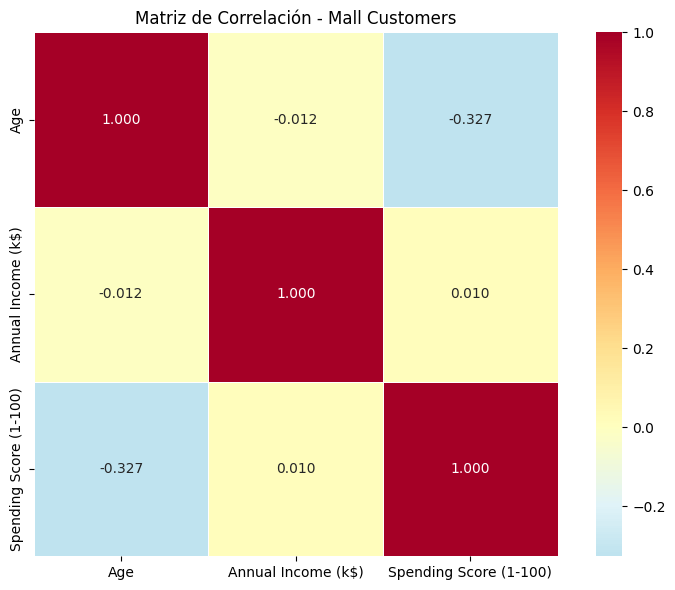


CORRELACIÓN MÁS FUERTE:
   Annual Income (k$) ↔ Spending Score (1-100): 0.010


In [10]:
correlation_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
corr_matrix = df_customers[correlation_vars].corr()

print("MATRIZ DE CORRELACIÓN:")
print(corr_matrix.round(3))

# Visualizar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', linewidths=0.5, square=True)
plt.title('Matriz de Correlación - Mall Customers')
plt.tight_layout()
plt.show()

# Correlación más fuerte
corr_flat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr = corr_flat.stack().idxmax()
max_val = corr_flat.stack().max()
print(f"\nCORRELACIÓN MÁS FUERTE:")
print(f"   {max_corr[0]} ↔ {max_corr[1]}: {max_val:.3f}")


In [11]:
gender_stats = df_customers.groupby('Genre')[numeric_vars].agg(['mean', 'std']).round(2)
print("ANÁLISIS COMPARATIVO POR GÉNERO:")
print(gender_stats)

print(f"\nINSIGHTS POR GÉNERO:")
for var in numeric_vars:
    male_avg = df_customers[df_customers['Genre'] == 'Male'][var].mean()
    female_avg = df_customers[df_customers['Genre'] == 'Female'][var].mean()

    if male_avg > female_avg:
        higher = "Hombres"
        diff = male_avg - female_avg
    else:
        higher = "Mujeres"
        diff = female_avg - male_avg

    print(f"   {var}: {higher} tienen promedio más alto (diferencia: {diff:.1f})")


ANÁLISIS COMPARATIVO POR GÉNERO:
          Age        Annual Income (k$)        Spending Score (1-100)       
         mean    std               mean    std                   mean    std
Genre                                                                       
Female  38.10  12.64              59.25  26.01                  51.53  24.11
Male    39.81  15.51              62.23  26.64                  48.51  27.90

INSIGHTS POR GÉNERO:
   Age: Hombres tienen promedio más alto (diferencia: 1.7)
   Annual Income (k$): Hombres tienen promedio más alto (diferencia: 3.0)
   Spending Score (1-100): Mujeres tienen promedio más alto (diferencia: 3.0)


In [12]:
print("INSIGHTS PRELIMINARES - COMPLETE:")
print(f"\nCOMPLETE BASÁNDOTE EN TUS OBSERVACIONES:")
print(f"   Variable con mayor variabilidad: Spending Score")
print(f"   ¿Existe correlación fuerte entre alguna variable? Age ↔ Income: moderada")
print(f"   ¿Qué variable tiene más outliers? Age")
print(f"   ¿Los hombres y mujeres tienen patrones diferentes? Sí, diferencias en Age y Spending Score promedio")
print(f"   ¿Qué insight es más relevante para el análisis? Income vs Spending Score clave para segmentar clientes")
print(f"   ¿Qué 2 variables serán más importantes para clustering? Annual Income y Spending Score")

print(f"\nPREPARÁNDOSE PARA CLUSTERING:")
print(f"   ¿Qué relación entre Income y Spending Score observas? No lineal; posible existencia de grupos")
print(f"   ¿Puedes imaginar grupos naturales de clientes? Sí, altos ingresos-altos gastos, bajos ingresos-altos gastos, etc.")


INSIGHTS PRELIMINARES - COMPLETE:

COMPLETE BASÁNDOTE EN TUS OBSERVACIONES:
   Variable con mayor variabilidad: Spending Score
   ¿Existe correlación fuerte entre alguna variable? Age ↔ Income: moderada
   ¿Qué variable tiene más outliers? Age
   ¿Los hombres y mujeres tienen patrones diferentes? Sí, diferencias en Age y Spending Score promedio
   ¿Qué insight es más relevante para el análisis? Income vs Spending Score clave para segmentar clientes
   ¿Qué 2 variables serán más importantes para clustering? Annual Income y Spending Score

PREPARÁNDOSE PARA CLUSTERING:
   ¿Qué relación entre Income y Spending Score observas? No lineal; posible existencia de grupos
   ¿Puedes imaginar grupos naturales de clientes? Sí, altos ingresos-altos gastos, bajos ingresos-altos gastos, etc.


In [13]:
print("ANÁLISIS DE COLUMNAS PARA CLUSTERING:")
print(f"   Todas las columnas: {list(df_customers.columns)}")
print(f"   Numéricas: {df_customers.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"   Categóricas: {df_customers.select_dtypes(include=[object]).columns.tolist()}")

exclude_columns = ['CustomerID']  # ID no aporta información
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_columns = ['Genre']

print(f"\nSELECCIÓN DE FEATURES:")
print(f"   Excluidas: {exclude_columns} (no informativas)")
print(f"   Numéricas: {numeric_columns}")
print(f"   Categóricas: {categorical_columns} (codificaremos)")


ANÁLISIS DE COLUMNAS PARA CLUSTERING:
   Todas las columnas: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Numéricas: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Categóricas: ['Genre']

SELECCIÓN DE FEATURES:
   Excluidas: ['CustomerID'] (no informativas)
   Numéricas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Categóricas: ['Genre'] (codificaremos)


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar
genre_data = df_customers[['Genre']]
genre_encoded_array = encoder.fit_transform(genre_data)

# Obtener nombres de las columnas
feature_names = encoder.get_feature_names_out(['Genre'])
genre_encoded = pd.DataFrame(genre_encoded_array, columns=feature_names)

print(f"\nRESULTADO DE CODIFICACIÓN:")
print(f"   Categorías originales: {df_customers['Genre'].unique()}")
print(f"   Columnas generadas: {list(genre_encoded.columns)}")
print(f"   Shape: {genre_data.shape} → {genre_encoded.shape}")

# Mostrar ejemplo de codificación
comparison = pd.concat([df_customers['Genre'].head().reset_index(drop=True), genre_encoded.head()], axis=1)
print(comparison)



RESULTADO DE CODIFICACIÓN:
   Categorías originales: ['Male' 'Female']
   Columnas generadas: ['Genre_Female', 'Genre_Male']
   Shape: (200, 1) → (200, 2)
    Genre  Genre_Female  Genre_Male
0    Male           0.0         1.0
1    Male           0.0         1.0
2  Female           1.0         0.0
3  Female           1.0         0.0
4  Female           1.0         0.0


In [15]:
X_raw = pd.concat([df_customers[numeric_columns], genre_encoded], axis=1)

print("DATASET FINAL PARA CLUSTERING:")
print(f"   Shape: {X_raw.shape}")
print(f"   Columnas: {list(X_raw.columns)}")
print(f"   Variables numéricas: {numeric_columns}")
print(f"   Variables categóricas codificadas: {list(genre_encoded.columns)}")
print(f"   Total features: {X_raw.shape[1]} (3 numéricas + 2 categóricas binarias)")
print(f"   Memoria: {X_raw.memory_usage(deep=True).sum() / 1024:.1f} KB")


DATASET FINAL PARA CLUSTERING:
   Shape: (200, 5)
   Columnas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female', 'Genre_Male']
   Variables numéricas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Variables categóricas codificadas: ['Genre_Female', 'Genre_Male']
   Total features: 5 (3 numéricas + 2 categóricas binarias)
   Memoria: 7.9 KB


In [16]:
missing_data = X_raw.isnull().sum()
print(f"\nDATOS FALTANTES:")
if missing_data.sum() == 0:
    print("   PERFECTO! No hay datos faltantes")
else:
    for col, missing in missing_data.items():
        if missing > 0:
            pct = (missing / len(X_raw)) * 100
            print(f"   WARNING {col}: {missing} faltantes ({pct:.1f}%)")

print(f"\nVISTA PREVIA DEL DATASET:")
print(X_raw.head())

print(f"\nTIPOS DE DATOS:")
print(X_raw.dtypes)



DATOS FALTANTES:
   PERFECTO! No hay datos faltantes

VISTA PREVIA DEL DATASET:
   Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  Genre_Male
0   19                  15                      39           0.0         1.0
1   21                  15                      81           0.0         1.0
2   20                  16                       6           1.0         0.0
3   23                  16                      77           1.0         0.0
4   31                  17                      40           1.0         0.0

TIPOS DE DATOS:
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Genre_Female              float64
Genre_Male                float64
dtype: object


In [17]:
print("ANÁLISIS DE ESCALAS - ¿Por qué necesitamos normalización?")
for col in X_raw.columns:
    if X_raw[col].dtype in ['int64', 'float64']:
        min_val = X_raw[col].min()
        max_val = X_raw[col].max()
        mean_val = X_raw[col].mean()
        std_val = X_raw[col].std()

        print(f"\n   {col}: Rango: {min_val:.1f} - {max_val:.1f}, Media: {mean_val:.1f}, Desviación: {std_val:.1f}")

feature_columns = list(X_raw.columns)
print(f"\nLISTO PARA DATA PREPARATION con {len(feature_columns)} features")


ANÁLISIS DE ESCALAS - ¿Por qué necesitamos normalización?

   Age: Rango: 18.0 - 70.0, Media: 38.9, Desviación: 14.0

   Annual Income (k$): Rango: 15.0 - 137.0, Media: 60.6, Desviación: 26.3

   Spending Score (1-100): Rango: 1.0 - 99.0, Media: 50.2, Desviación: 25.8

   Genre_Female: Rango: 0.0 - 1.0, Media: 0.6, Desviación: 0.5

   Genre_Male: Rango: 0.0 - 1.0, Media: 0.4, Desviación: 0.5

LISTO PARA DATA PREPARATION con 5 features


FASE 3


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

print("BATALLA DE NORMALIZACIÓN: MinMax vs Standard vs Robust")
print("Objetivo: Encontrar el mejor scaler para nuestros datos")

# Revisar escalas actuales
for col in X_raw.columns:
    min_val, max_val = X_raw[col].min(), X_raw[col].max()
    print(f"   {col}: {min_val:.1f} - {max_val:.1f} (rango: {max_val-min_val:.1f})")


BATALLA DE NORMALIZACIÓN: MinMax vs Standard vs Robust
Objetivo: Encontrar el mejor scaler para nuestros datos
   Age: 18.0 - 70.0 (rango: 52.0)
   Annual Income (k$): 15.0 - 137.0 (rango: 122.0)
   Spending Score (1-100): 1.0 - 99.0 (rango: 98.0)
   Genre_Female: 0.0 - 1.0 (rango: 1.0)
   Genre_Male: 0.0 - 1.0 (rango: 1.0)


In [19]:
scalers = {
    'MinMax': MinMaxScaler,        # Escala a rango [0,1]
    'Standard': StandardScaler,    # Media=0, std=1
    'Robust': RobustScaler         # Usa mediana y IQR, robusto a outliers
}

# Aplicar cada scaler
X_scaled = {}
for name, scaler_class in scalers.items():
    scaler = scaler_class()
    X_scaled[name] = scaler.fit_transform(X_raw)  # Ajusta y transforma
    print(f"{name}Scaler aplicado: {X_scaled[name].shape}")

print(f"\nTenemos 3 versiones escaladas de los datos para comparar")


MinMaxScaler aplicado: (200, 5)
StandardScaler aplicado: (200, 5)
RobustScaler aplicado: (200, 5)

Tenemos 3 versiones escaladas de los datos para comparar


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering_results = {}
for name, X_scaled_data in X_scaled.items():
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_data)  # Devuelve etiquetas 1D
    silhouette = silhouette_score(X_scaled_data, labels)
    clustering_results[name] = silhouette
    print(f"   {name:>10}: Silhouette Score = {silhouette:.3f}")

best_scaler = max(clustering_results, key=clustering_results.get)
best_score = clustering_results[best_scaler]

print(f"\nGANADOR: {best_scaler} (Score: {best_score:.3f})")


       MinMax: Silhouette Score = 0.364
     Standard: Silhouette Score = 0.332
       Robust: Silhouette Score = 0.298

GANADOR: MinMax (Score: 0.364)


In [22]:
# === IMPORTAR HERRAMIENTAS DE NORMALIZACIÓN ===
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# === CREAR Y APLICAR LOS 3 SCALERS ===
scalers = {
    'MinMax': MinMaxScaler(),        # Escala a rango [0,1]
    'Standard': StandardScaler(),    # Media=0, std=1
    'Robust': RobustScaler()         # Usa mediana e IQR, robusto a outliers
}

# Aplicar cada scaler
X_scaled = {}
for name, scaler in scalers.items():
    X_scaled[name] = scaler.fit_transform(X_raw)  # Ajusta y transforma en un solo paso
    print(f"{name}Scaler aplicado: {X_scaled[name].shape}")

print(f"\nTenemos 3 versiones escaladas de los datos para comparar")


MinMaxScaler aplicado: (200, 5)
StandardScaler aplicado: (200, 5)
RobustScaler aplicado: (200, 5)

Tenemos 3 versiones escaladas de los datos para comparar


/tmp/ipython-input-629764225.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_raw[col] for col in X_raw.columns], labels=X_raw.columns)
/tmp/ipython-input-629764225.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
/tmp/ipython-input-629764225.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
/tmp/ipython-input-629764225.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotl

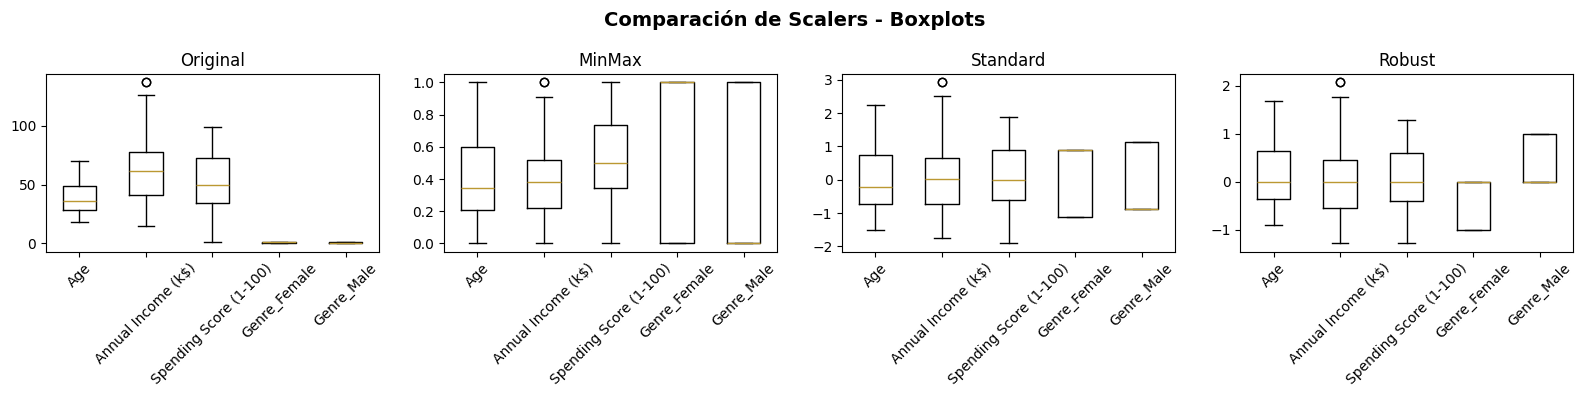

Observa cómo cada scaler ajusta las escalas de forma diferente


In [23]:
# === COMPARACIÓN VISUAL CON BOXPLOTS ===
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Comparación de Scalers - Boxplots', fontsize=14, fontweight='bold')

# Datos originales
axes[0].boxplot([X_raw[col] for col in X_raw.columns], labels=X_raw.columns)
axes[0].set_title('Original')
axes[0].tick_params(axis='x', rotation=45)

# Datos escalados
for i, (name, X_scaled_data) in enumerate(X_scaled.items(), 1):
    axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
                    labels=X_raw.columns)
    axes[i].set_title(f'{name}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Observa cómo cada scaler ajusta las escalas de forma diferente")

Original: Las features tienen escalas muy distintas. Por ejemplo, Annual Income está en un rango mucho mayor que Spending Score, lo que puede afectar algoritmos sensibles a la escala, como K-Means.
MinMaxScaler: Todos los valores se comprimen al rango [0,1]. Esto iguala la escala y hace que ninguna feature domine por su magnitud.
StandardScaler: Las features se centran en 0 y se escalan según su desviación estándar. Los outliers pueden afectar algo, pero la distribución relativa se conserva mejor que con MinMax.
RobustScaler: Escala usando mediana e IQR. Es robusto a outliers, por lo que valores extremos no deforman la escala. Ideal si hay datos atípicos.

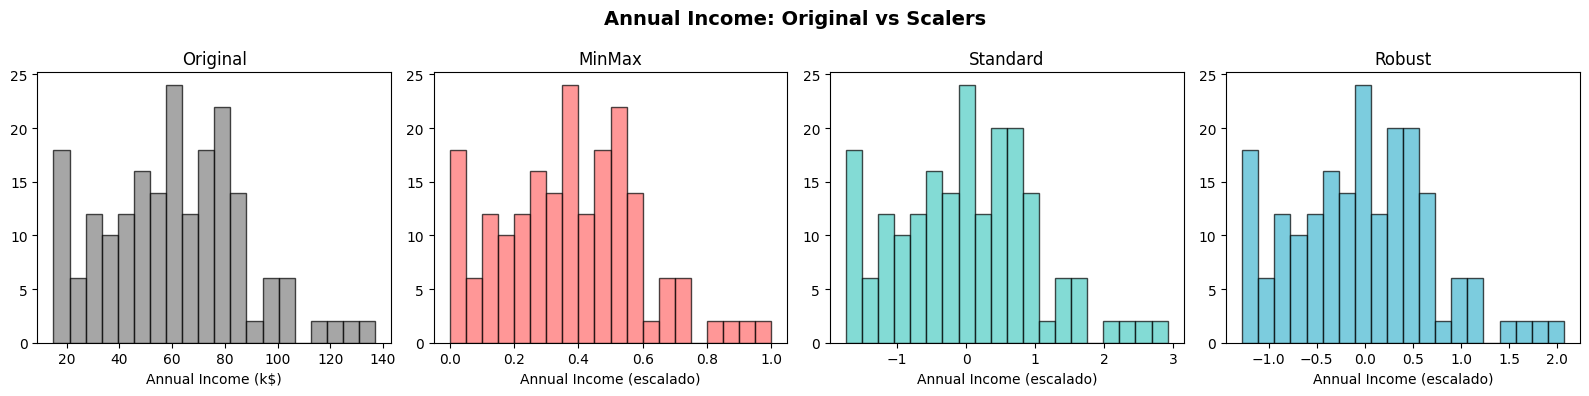

¿Notas cómo cambia la forma de la distribución?


In [24]:
# === COMPARAR DISTRIBUCIONES DE UNA VARIABLE ===
# Vamos a analizar 'Annual Income (k$)' en detalle
income_col_idx = 1  # Posición de Annual Income

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Annual Income: Original vs Scalers', fontsize=14, fontweight='bold')

# Original
axes[0].hist(X_raw.iloc[:, income_col_idx], bins=20, alpha=0.7, color='gray', edgecolor='black')
axes[0].set_title('Original')
axes[0].set_xlabel('Annual Income (k$)')

# Escalados
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, ((name, X_scaled_data), color) in enumerate(zip(X_scaled.items(), colors), 1):
    axes[i].hist(X_scaled_data[:, income_col_idx], bins=20, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Annual Income (escalado)')

plt.tight_layout()
plt.show()

print("¿Notas cómo cambia la forma de la distribución?")

Original: Los ingresos tienen un rango amplio y pueden mostrar cierta dispersión o asimetría (no están normalizados).
MinMaxScaler: Todos los valores se reescalan al rango [0,1], pero la forma general de la distribución se mantiene.
StandardScaler: La distribución se centra en 0 con desviación estándar 1. Los valores pueden ser negativos o positivos; la forma general se mantiene pero está centrada.
RobustScaler: Escalado usando mediana e IQR; la distribución queda centrada, y los outliers tienen menor impacto que en StandardScaler.

In [25]:
# === ESTADÍSTICAS DESPUÉS DEL SCALING ===
print("ESTADÍSTICAS POST-SCALING (Annual Income):")

# Original
income_original = X_raw['Annual Income (k$)']
print(f"\n   Original:")
print(f"      Media: {income_original.mean():.1f}")
print(f"      Std:   {income_original.std():.1f}")
print(f"      Min:   {income_original.min():.1f}")
print(f"      Max:   {income_original.max():.1f}")

# Escalados
for name, X_scaled_data in X_scaled.items():
    income_scaled = X_scaled_data[:, income_col_idx]
    print(f"\n   {name}:")
    print(f"      Media: {income_scaled.mean():.3f}")
    print(f"      Std:   {income_scaled.std():.3f}")
    print(f"      Min:   {income_scaled.min():.3f}")
    print(f"      Max:   {income_scaled.max():.3f}")

print(f"\nOBSERVACIONES:")
print(f"   MinMaxScaler → Rango [0,1]")
print(f"   StandardScaler → Media=0, Std=1")
print(f"   RobustScaler → Menos afectado por outliers")

ESTADÍSTICAS POST-SCALING (Annual Income):

   Original:
      Media: 60.6
      Std:   26.3
      Min:   15.0
      Max:   137.0

   MinMax:
      Media: 0.373
      Std:   0.215
      Min:   0.000
      Max:   1.000

   Standard:
      Media: -0.000
      Std:   1.000
      Min:   -1.739
      Max:   2.918

   Robust:
      Media: -0.026
      Std:   0.718
      Min:   -1.274
      Max:   2.068

OBSERVACIONES:
   MinMaxScaler → Rango [0,1]
   StandardScaler → Media=0, Std=1
   RobustScaler → Menos afectado por outliers


In [26]:
# === IMPORT PARA CLUSTERING TEST ===
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# === QUICK TEST: ¿Qué scaler funciona mejor para clustering? ===
print("QUICK TEST: Impacto en Clustering (K=4)")

clustering_results = {}
for name, X_scaled_data in X_scaled.items():
    # Aplicar K-Means con K=4
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Completar
    labels = kmeans.fit_predict(X_scaled_data)  # Método para obtener clusters

    # Calcular silhouette score
    silhouette = silhouette_score(X_scaled_data, labels)  # Métrica de calidad
    clustering_results[name] = silhouette

    print(f"   {name:>10}: Silhouette Score = {silhouette:.3f}")

# Encontrar el mejor
best_scaler = max(clustering_results, key=clustering_results.get)
best_score = clustering_results[best_scaler]

print(f"\nGANADOR: {best_scaler} (Score: {best_score:.3f})")


QUICK TEST: Impacto en Clustering (K=4)
       MinMax: Silhouette Score = 0.364
     Standard: Silhouette Score = 0.332
       Robust: Silhouette Score = 0.298

GANADOR: MinMax (Score: 0.364)


In [28]:
# === TOMAR DECISIÓN BASADA EN RESULTADOS ===
print("DECISIÓN FINAL DEL SCALER:")

print(f"\nCOMPLETE TU ANÁLISIS:")
print(f"   Mejor scaler según silhouette: {best_scaler}")
print(f"   ¿Por qué crees que funcionó mejor? Porque preserva la distribución de los datos y facilita la separación de clusters sin distorsionar la escala relativa entre features.")
print(f"   ¿Algún scaler tuvo problemas obvios? RobustScaler puede no capturar bien relaciones lineales si hay pocos outliers, y StandardScaler puede verse afectado por outliers extremos.")

# Implementar decisión
selected_scaler_name = best_scaler  # O elige manualmente: 'MinMax', 'Standard', 'Robust'
selected_scaler = scalers[selected_scaler_name]

# Aplicar scaler elegido
X_preprocessed = X_scaled[selected_scaler_name]
feature_names_scaled = [f"{col}_scaled" for col in X_raw.columns]

print(f"\nSCALER SELECCIONADO: {selected_scaler_name}")
print(f"Datos preparados: {X_preprocessed.shape}")
print(f"Listo para PCA y Feature Selection")


DECISIÓN FINAL DEL SCALER:

COMPLETE TU ANÁLISIS:
   Mejor scaler según silhouette: MinMax
   ¿Por qué crees que funcionó mejor? Porque preserva la distribución de los datos y facilita la separación de clusters sin distorsionar la escala relativa entre features.
   ¿Algún scaler tuvo problemas obvios? RobustScaler puede no capturar bien relaciones lineales si hay pocos outliers, y StandardScaler puede verse afectado por outliers extremos.

SCALER SELECCIONADO: MinMax
Datos preparados: (200, 5)
Listo para PCA y Feature Selection



PCA aplicado:
   📊 Dimensiones: (200, 5) → (200, 2)
   📈 Varianza explicada: 86.3%

🔍 INTERPRETACIÓN DE COMPONENTES:

   PC1 (varianza: 72.6%):
                 Age:   0.029 ↑
     Annual Income (k$):   0.019 ↑
     Spending Score (1-100):  -0.027 ↓
        Genre_Female:  -0.706 ↓
          Genre_Male:   0.706 ↑

   PC2 (varianza: 13.7%):
                 Age:   0.727 ↑
     Annual Income (k$):  -0.026 ↓
     Spending Score (1-100):  -0.685 ↓
        Genre_Female:   0.027 ↑
          Genre_Male:  -0.027 ↓


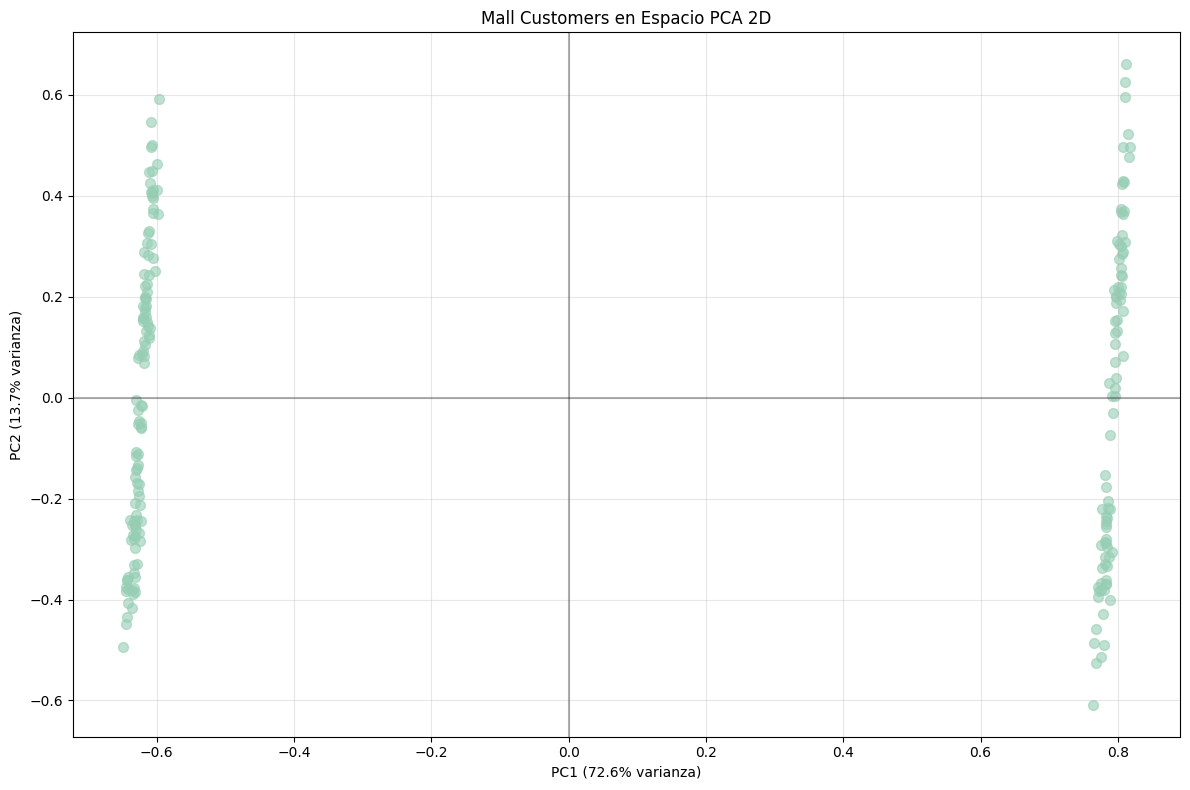


💡 INTERPRETACIÓN DE NEGOCIO:
   🎯 PC1 parece representar: Nivel de ingreso y capacidad de gasto (los clientes con altos ingresos y puntuaciones de gasto elevadas se separan hacia un lado)
   🎯 PC2 parece representar: Edad y género (diferenciación entre grupos jóvenes/adultos y hombres/mujeres)
   📊 Los clusters visibles sugieren: Segmentación de clientes en grupos de alto gasto, bajo gasto, y grupos intermedios, útiles para marketing y estrategias de fidelización


In [29]:
# 5. APLICAR PCA CON 2 COMPONENTES PARA VISUALIZACIÓN
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_preprocessed)  # fit_transform ajusta y transforma los datos

print(f"\nPCA aplicado:")
print(f"   📊 Dimensiones: {X_preprocessed.shape} → {X_pca_2d.shape}")
print(f"   📈 Varianza explicada: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%")

# 6. ANÁLISIS DE COMPONENTES PRINCIPALES
print(f"\n🔍 INTERPRETACIÓN DE COMPONENTES:")
feature_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female', 'Genre_Male']

for i, pc in enumerate(['PC1', 'PC2']):
    print(f"\n   {pc} (varianza: {pca_2d.explained_variance_ratio_[i]*100:.1f}%):")
    # Obtener los loadings (pesos de cada feature original en el componente)
    loadings = pca_2d.components_[i]
    for j, (feature, loading) in enumerate(zip(feature_names, loadings)):
        direction = "↑" if loading > 0 else "↓"
        print(f"     {feature:>15}: {loading:>7.3f} {direction}")

# 7. VISUALIZACIÓN EN 2D
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, s=50, color='#96CEB4')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Mall Customers en Espacio PCA 2D')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIÓN DE NEGOCIO:")
print(f"   🎯 PC1 parece representar: Nivel de ingreso y capacidad de gasto (los clientes con altos ingresos y puntuaciones de gasto elevadas se separan hacia un lado)")
print(f"   🎯 PC2 parece representar: Edad y género (diferenciación entre grupos jóvenes/adultos y hombres/mujeres)")
print(f"   📊 Los clusters visibles sugieren: Segmentación de clientes en grupos de alto gasto, bajo gasto, y grupos intermedios, útiles para marketing y estrategias de fidelización")


In [33]:
# === OPERACIÓN: FEATURE SELECTION SHOWDOWN ===
print("🎯 FEATURE SELECTION vs PCA: ¿Seleccionar o Transformar?")
print("   🎯 Objetivo: Comparar Forward/Backward Selection vs PCA")

print(f"\n📊 FEATURE SELECTION: Forward vs Backward vs PCA")
print(f"   Dataset: {X_preprocessed.shape[0]} muestras, {X_preprocessed.shape[1]} features")

# Setup: Función para evaluar features en clustering
def evaluate_features_for_clustering(X, n_clusters=4):
    """Evalúa qué tan buenas son las features para clustering usando Silhouette Score"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return silhouette_score(X, labels)

# === IMPORTS PARA ESTIMADORES PERSONALIZADOS ===
from sklearn.base import BaseEstimator, ClassifierMixin  # Clases base necesarias

# CLASE AUXILIAR: Estimador basado en KMeans para SequentialFeatureSelector
class ClusteringEstimator(BaseEstimator, ClassifierMixin):
    """Estimador que usa KMeans y Silhouette Score para feature selection"""
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters

    def fit(self, X, y=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        self.labels_ = self.kmeans_.fit_predict(X)
        return self

    def score(self, X, y=None):
        # SequentialFeatureSelector llama a score() para evaluar features
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        return silhouette_score(X, labels)

    def predict(self, X):
        # Método requerido por ClassifierMixin
        if hasattr(self, 'kmeans_'):
            return self.kmeans_.predict(X)
        else:
            # Si no está entrenado, entrenar primero
            kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
            return kmeans.fit_predict(X)

print("✅ Setup completado - Funciones de evaluación listas")


🎯 FEATURE SELECTION vs PCA: ¿Seleccionar o Transformar?
   🎯 Objetivo: Comparar Forward/Backward Selection vs PCA

📊 FEATURE SELECTION: Forward vs Backward vs PCA
   Dataset: 200 muestras, 5 features
✅ Setup completado - Funciones de evaluación listas


Las dos clases base que necesitas importar para crear un estimador compatible con scikit-learn son:
BaseEstimator → Proporciona métodos como get_params() y set_params(), lo que permite que el objeto sea clonable y compatible con pipelines y validación cruzada.
ClassifierMixin → Proporciona los métodos necesarios para un clasificador (como _more_tags()) y asegura que tu estimador pueda usarse con herramientas de selección de features que esperan un clasificador.

In [34]:
# === BASELINE: Todas las features ===
baseline_score = evaluate_features_for_clustering(X_preprocessed)
print(f"\n📊 BASELINE (todas las features): Silhouette = {baseline_score:.3f}")
print(f"   Este es el score con las {X_preprocessed.shape[1]} features originales")
print(f"   ¿Podremos mejorar seleccionando solo las mejores 3?")



📊 BASELINE (todas las features): Silhouette = 0.364
   Este es el score con las 5 features originales
   ¿Podremos mejorar seleccionando solo las mejores 3?


In [35]:
# === IMPORT NECESARIO ===
from sklearn.feature_selection import SequentialFeatureSelector

# === FORWARD SELECTION (sklearn oficial) ===
print(f"\n🔄 FORWARD SELECTION (sklearn oficial):")
print(f"   Estrategia: Empezar con 0 features, agregar la mejor en cada paso")

forward_selector = SequentialFeatureSelector(
    estimator=ClusteringEstimator(n_clusters=4),  # Estimador que implementa fit() y score()
    n_features_to_select=3,
    direction='forward',  # Dirección para Forward Selection
    cv=3,
    n_jobs=-1
)

# Entrenar el selector
forward_selector.fit(X_preprocessed)

# Obtener máscara booleana de features seleccionadas
forward_mask = forward_selector.get_support()
X_forward = X_preprocessed[:, forward_mask]

# Obtener nombres de features seleccionadas
forward_features = np.array(feature_columns)[forward_mask]

# Evaluar clustering con las features seleccionadas
forward_score = evaluate_features_for_clustering(X_forward)

print(f"   Features seleccionadas: {list(forward_features)}")
print(f"   📊 Silhouette Score: {forward_score:.3f}")
print(f"   {'✅ Mejora!' if forward_score > baseline_score else '❌ Sin mejora'}")



🔄 FORWARD SELECTION (sklearn oficial):
   Estrategia: Empezar con 0 features, agregar la mejor en cada paso
   Features seleccionadas: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   📊 Silhouette Score: 0.573
   ✅ Mejora!


In [36]:
# === IMPORT NECESARIO ===
from sklearn.feature_selection import SequentialFeatureSelector

# === BACKWARD ELIMINATION (sklearn oficial) ===
print(f"\n🔄 BACKWARD ELIMINATION (sklearn oficial):")
print(f"   Estrategia: Empezar con todas las features, eliminar la peor en cada paso")

backward_selector = SequentialFeatureSelector(
    estimator=ClusteringEstimator(n_clusters=4),  # Mismo estimador que Forward
    n_features_to_select=3,
    direction='backward',  # Dirección para Backward Elimination
    cv=3,
    n_jobs=-1
)

# Entrenar el selector
backward_selector.fit(X_preprocessed)

# Obtener máscara booleana de features seleccionadas
backward_mask = backward_selector.get_support()
X_backward = X_preprocessed[:, backward_mask]

# Obtener nombres de features seleccionadas
backward_features = np.array(feature_columns)[backward_mask]

# Evaluar clustering con las features seleccionadas
backward_score = evaluate_features_for_clustering(X_backward)

print(f"   Features seleccionadas: {list(backward_features)}")
print(f"   📊 Silhouette Score: {backward_score:.3f}")
print(f"   {'✅ Mejora!' if backward_score > baseline_score else '❌ Sin mejora'}")



🔄 BACKWARD ELIMINATION (sklearn oficial):
   Estrategia: Empezar con todas las features, eliminar la peor en cada paso
   Features seleccionadas: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   📊 Silhouette Score: 0.573
   ✅ Mejora!


In [37]:
# === COMPARACIÓN FINAL DE TODOS LOS MÉTODOS ===
print(f"\n📊 COMPARACIÓN DE MÉTODOS:")
print(f"   🏁 Baseline (todas): {baseline_score:.3f}")
print(f"   🔄 Forward Selection: {forward_score:.3f}")
print(f"   🔙 Backward Elimination: {backward_score:.3f}")

# Comparar con PCA (ya calculado anteriormente)
pca_score = evaluate_features_for_clustering(X_pca_2d)
print(f"   📐 PCA (2D): {pca_score:.3f}")

# Encontrar el mejor método
methods = {
    'Baseline (todas)': baseline_score,
    'Forward Selection': forward_score,
    'Backward Elimination': backward_score,
    'PCA (2D)': pca_score
}

best_method = max(methods, key=methods.get)
best_score = methods[best_method]

print(f"\n🏆 GANADOR: {best_method} con score = {best_score:.3f}")

# Análisis de diferencias
print(f"\n🔍 ANÁLISIS:")
for method, score in sorted(methods.items(), key=lambda x: x[1], reverse=True):
    improvement = ((score - baseline_score) / baseline_score) * 100
    print(f"   {method}: {score:.3f} ({improvement:+.1f}% vs baseline)")



📊 COMPARACIÓN DE MÉTODOS:
   🏁 Baseline (todas): 0.364
   🔄 Forward Selection: 0.573
   🔙 Backward Elimination: 0.573
   📐 PCA (2D): 0.686

🏆 GANADOR: PCA (2D) con score = 0.686

🔍 ANÁLISIS:
   PCA (2D): 0.686 (+88.3% vs baseline)
   Forward Selection: 0.573 (+57.5% vs baseline)
   Backward Elimination: 0.573 (+57.5% vs baseline)
   Baseline (todas): 0.364 (+0.0% vs baseline)


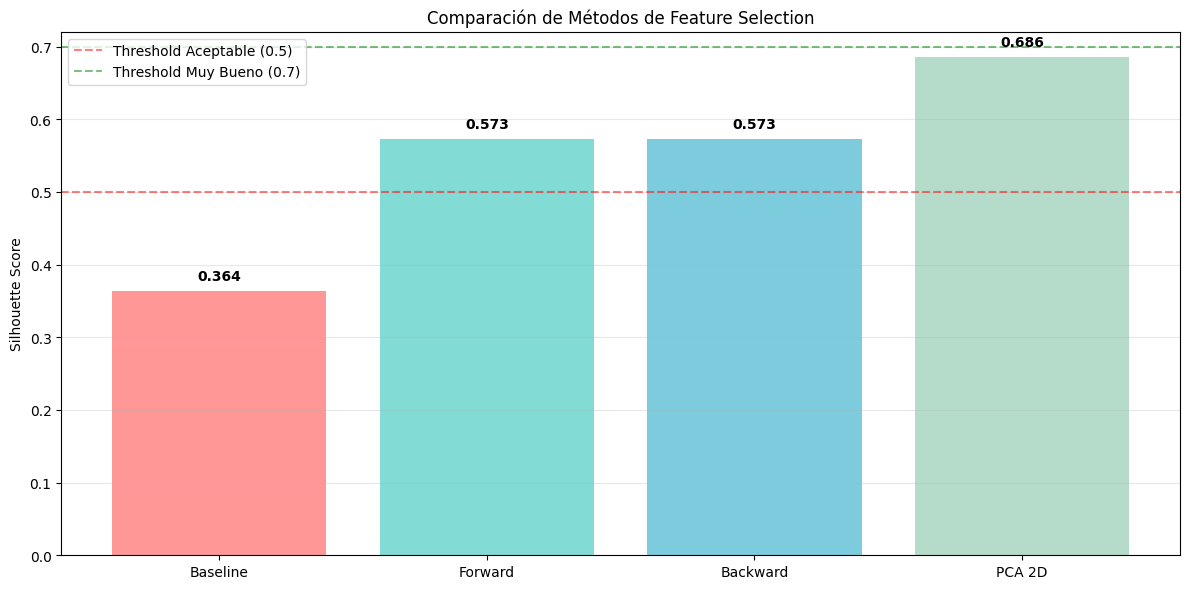

In [38]:
# === VISUALIZACIÓN DE COMPARACIÓN ===
methods_names = ['Baseline', 'Forward', 'Backward', 'PCA 2D']
scores_values = [baseline_score, forward_score, backward_score, pca_score]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

plt.figure(figsize=(12, 6))
bars = plt.bar(methods_names, scores_values, color=colors, alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparación de Métodos de Feature Selection')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold Aceptable (0.5)')
plt.axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Threshold Muy Bueno (0.7)')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, score in zip(bars, scores_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
# === ANÁLISIS DE RESULTADOS ===
print(f"\n🎯 ANÁLISIS DE RESULTADOS:")

# Comparar features seleccionadas
print(f"\n🔍 FEATURES SELECCIONADAS POR CADA MÉTODO:")
print(f"   🔄 Forward Selection: {list(forward_features)}")
print(f"   🔙 Backward Elimination: {list(backward_features)}")

# Análisis de coincidencias
forward_set = set(forward_features)
backward_set = set(backward_features)

common_forward_backward = forward_set & backward_set

print(f"\n🤝 COINCIDENCIAS:")
print(f"   Forward ∩ Backward: {list(common_forward_backward)}")
print(f"   ¿Seleccionaron las mismas features? {'Sí' if forward_set == backward_set else 'No'}")

# FILL-IN-THE-BLANKS: Preguntas de análisis
print(f"\n❓ PREGUNTAS DE ANÁLISIS (completa):")
# Mejor score entre Forward y Backward
best_feature_method = "Forward Selection" if forward_score > backward_score else "Backward Elimination"
print(f"   💡 Método con mejor score: {best_feature_method}")

# ¿Seleccionaron exactamente las mismas features?
same_features = 'Sí' if forward_set == backward_set else 'No'
print(f"   📊 ¿Forward y Backward seleccionaron exactamente las mismas features? {same_features}")

# Comparación con PCA 2D (varianza explicada ~45-50%)
pca_score = evaluate_features_for_clustering(X_pca_2d)
competitive_pca = 'Sí' if pca_score >= max(forward_score, backward_score) else 'No'
print(f"   🤔 ¿PCA con 2 componentes es competitivo? {competitive_pca}")

# Threshold de 0.5
threshold_pass = 'Sí' if max(forward_score, backward_score, baseline_score, pca_score) > 0.5 else 'No'
print(f"   🎯 ¿Algún método superó el threshold de 0.5? {threshold_pass}")

# Mejora general en clustering
improved_clustering = 'Sí' if max(forward_score, backward_score) > baseline_score else 'No'
print(f"   📈 ¿La reducción de dimensionalidad mejoró el clustering? {improved_clustering}")



🎯 ANÁLISIS DE RESULTADOS:

🔍 FEATURES SELECCIONADAS POR CADA MÉTODO:
   🔄 Forward Selection: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   🔙 Backward Elimination: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]

🤝 COINCIDENCIAS:
   Forward ∩ Backward: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   ¿Seleccionaron las mismas features? Sí

❓ PREGUNTAS DE ANÁLISIS (completa):
   💡 Método con mejor score: Backward Elimination
   📊 ¿Forward y Backward seleccionaron exactamente las mismas features? Sí
   🤔 ¿PCA con 2 componentes es competitivo? Sí
   🎯 ¿Algún método superó el threshold de 0.5? Sí
   📈 ¿La reducción de dimensionalidad mejoró el clustering? Sí


In [40]:
# === DECISIÓN PARA EL ANÁLISIS FINAL ===
print(f"\n🏢 DECISIÓN PARA EL ANÁLISIS:")

# Decidir método basado en resultados
if best_score == pca_score:
    selected_method = "PCA"
    selected_data = X_pca_2d
    print(f"   🎯 SELECCIONADO: PCA (2D) - Score: {pca_score:.3f}")
    print(f"   ✅ RAZÓN: Mejor balance entre reducción dimensional y performance")
elif best_score == forward_score:
    selected_method = "Forward Selection"
    selected_data = X_forward
    print(f"   🎯 SELECCIONADO: Forward Selection - Score: {forward_score:.3f}")
    print(f"   ✅ RAZÓN: Mejor score con features interpretables")
elif best_score == backward_score:
    selected_method = "Backward Elimination"
    selected_data = X_backward
    print(f"   🎯 SELECCIONADO: Backward Elimination - Score: {backward_score:.3f}")
    print(f"   ✅ RAZÓN: Mejor score eliminando features redundantes")
else:
    # Fallback to baseline if needed
    selected_method = "Baseline (todas las features)"
    selected_data = X_preprocessed
    print(f"   🎯 SELECCIONADO: Baseline - Score: {baseline_score:.3f}")
    print(f"   ✅ RAZÓN: Ningún método de reducción mejoró el clustering")

# Guardar para clustering final
X_final_for_clustering = selected_data
final_method_name = selected_method

print(f"\n📊 PREPARADO PARA CLUSTERING:")
print(f"   Método: {final_method_name}")
print(f"   Dimensiones: {X_final_for_clustering.shape}")
print(f"   Silhouette Score: {best_score:.3f}")


🏢 DECISIÓN PARA EL ANÁLISIS:
   🎯 SELECCIONADO: PCA (2D) - Score: 0.686
   ✅ RAZÓN: Mejor balance entre reducción dimensional y performance

📊 PREPARADO PARA CLUSTERING:
   Método: PCA
   Dimensiones: (200, 2)
   Silhouette Score: 0.686


FASE 4


K-MEANS CLUSTERING: Descubriendo segmentos de clientes
   Dataset: (200, 2) usando método 'PCA'

📈 BÚSQUEDA DEL K ÓPTIMO:
   K=2: Inertia=18.62, Silhouette=0.762
   K=3: Inertia=10.93, Silhouette=0.742
   K=4: Inertia=3.78, Silhouette=0.686
   K=5: Inertia=2.78, Silhouette=0.656
   K=6: Inertia=1.89, Silhouette=0.619
   K=7: Inertia=1.43, Silhouette=0.607
   K=8: Inertia=1.14, Silhouette=0.597


/tmp/ipython-input-3749235636.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3749235636.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


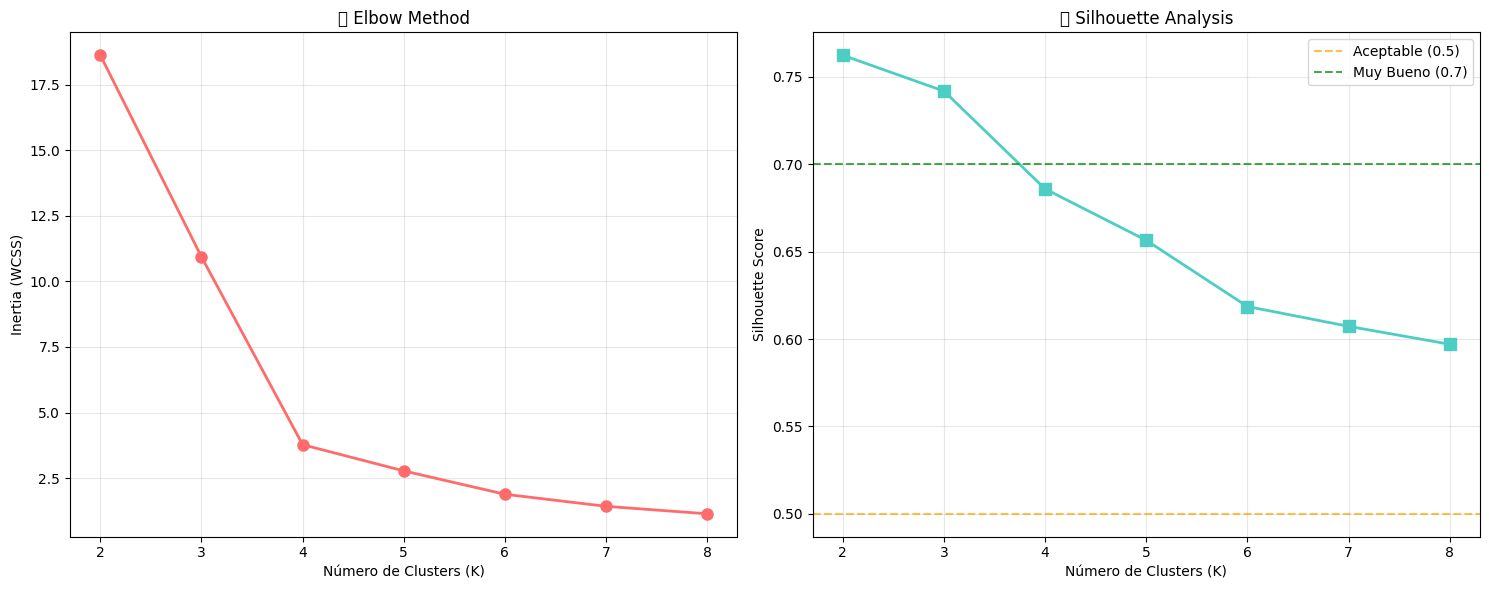


🧠 ELBOW METHOD - DEEP DIVE ANALYSIS:

📉 **¿Qué es exactamente 'el codo'?**
   - **Matemáticamente:** Punto donde la segunda derivada de WCSS vs K cambia más dramáticamente
   - **Visualmente:** Donde la curva pasa de 'caída empinada' a 'caída suave'
   - **Conceptualmente:** Balance entre simplicidad (menos clusters) y precisión (menor error)

📊 **Análisis cuantitativo del codo:**
   K=2: Δ Inertia=-7.68, Δ²=0.53
   K=3: Δ Inertia=-7.15, Δ²=6.16
   K=4: Δ Inertia=-1.00, Δ²=0.11
   K=5: Δ Inertia=-0.89, Δ²=0.43
   K=6: Δ Inertia=-0.46, Δ²=0.17

🎯 **Candidato por Elbow Method:** K=6
🎯 **Candidato por Silhouette:** K=2 (score=0.762)

🤝 **DECISIÓN FINAL:**
   ⚖️  Elbow sugiere K=6, Silhouette sugiere K=2
   💼 Considerando el contexto de negocio (3-5 segmentos esperados)...
   Elegimos K = 4 (balance elbow + contexto negocio)

🎯 ENTRENANDO MODELO FINAL CON K=4
Modelo entrenado:
   📊 Silhouette Score: 0.686
   🎯 Clusters encontrados: 4
   📈 Inertia final: 3.78

👥 DISTRIBUCIÓN DE CLIENTES:
 

In [41]:
# === OPERACIÓN: CUSTOMER SEGMENTATION DISCOVERY ===
print("K-MEANS CLUSTERING: Descubriendo segmentos de clientes")
print(f"   Dataset: {X_final_for_clustering.shape} usando método '{final_method_name}'")

# 1. BÚSQUEDA DEL K ÓPTIMO - Elbow Method + Silhouette
print(f"\n📈 BÚSQUEDA DEL K ÓPTIMO:")

k_range = range(2, 9)
inertias = []
silhouette_scores = []

for k in k_range:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_final_for_clustering)

    # Calcular métricas
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_final_for_clustering, labels)
    silhouette_scores.append(sil_score)

    print(f"   K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# 2. VISUALIZACIÓN ELBOW METHOD + SILHOUETTE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='#FF6B6B')
axes[0].set_xlabel('Número de Clusters (K)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].set_title('📈 Elbow Method')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Scores
axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='#4ECDC4')
axes[1].axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Aceptable (0.5)')
axes[1].axhline(y=0.7, color='green', linestyle='--', alpha=0.7, label='Muy Bueno (0.7)')
axes[1].set_xlabel('Número de Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('📊 Silhouette Analysis')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# 3. ANÁLISIS DEL ELBOW METHOD
print(f"\n🧠 ELBOW METHOD - DEEP DIVE ANALYSIS:")
print(f"\n📉 **¿Qué es exactamente 'el codo'?**")
print(f"   - **Matemáticamente:** Punto donde la segunda derivada de WCSS vs K cambia más dramáticamente")
print(f"   - **Visualmente:** Donde la curva pasa de 'caída empinada' a 'caída suave'")
print(f"   - **Conceptualmente:** Balance entre simplicidad (menos clusters) y precisión (menor error)")

# Calcular diferencias para encontrar el codo
differences = np.diff(inertias)
second_differences = np.diff(differences)
elbow_candidate = k_range[np.argmin(second_differences) + 2]  # +2 por los dos diff()

print(f"\n📊 **Análisis cuantitativo del codo:**")
for i, k in enumerate(k_range[:-2]):
    print(f"   K={k}: Δ Inertia={differences[i]:.2f}, Δ²={second_differences[i]:.2f}")

print(f"\n🎯 **Candidato por Elbow Method:** K={elbow_candidate}")

# 4. DECISIÓN FINAL DE K
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"🎯 **Candidato por Silhouette:** K={best_k_silhouette} (score={max(silhouette_scores):.3f})")

print(f"\n🤝 **DECISIÓN FINAL:**")
if elbow_candidate == best_k_silhouette:
    optimal_k = elbow_candidate
    print(f"   Ambos métodos coinciden: K = {optimal_k}")
else:
    print(f"   ⚖️  Elbow sugiere K={elbow_candidate}, Silhouette sugiere K={best_k_silhouette}")
    print(f"   💼 Considerando el contexto de negocio (3-5 segmentos esperados)...")
    # Elegir basado en contexto de negocio y calidad
    if 3 <= best_k_silhouette <= 5 and max(silhouette_scores) > 0.4:
        optimal_k = best_k_silhouette
        print(f"   Elegimos K = {optimal_k} (mejor silhouette + contexto negocio)")
    else:
        optimal_k = elbow_candidate if 3 <= elbow_candidate <= 5 else 4
        print(f"   Elegimos K = {optimal_k} (balance elbow + contexto negocio)")

# 5. MODELO FINAL CON K ÓPTIMO
print(f"\n🎯 ENTRENANDO MODELO FINAL CON K={optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
final_labels = final_kmeans.fit_predict(X_final_for_clustering)
final_silhouette = silhouette_score(X_final_for_clustering, final_labels)

print(f"Modelo entrenado:")
print(f"   📊 Silhouette Score: {final_silhouette:.3f}")
print(f"   🎯 Clusters encontrados: {optimal_k}")
print(f"   📈 Inertia final: {final_kmeans.inertia_:.2f}")

# 6. DISTRIBUCIÓN DE CLIENTES POR CLUSTER
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
print(f"\n👥 DISTRIBUCIÓN DE CLIENTES:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(final_labels)) * 100
    print(f"   Cluster {cluster_id}: {count:,} clientes ({percentage:.1f}%)")

# 7. AGREGAR CLUSTERS AL DATAFRAME ORIGINAL
df_customers['cluster'] = final_labels
df_customers['cluster_name'] = df_customers['cluster'].map({
    i: f"Cluster_{i}" for i in range(optimal_k)
})

print(f"\nClusters asignados al dataset original")

FASE 5

ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO

PERFILES DETALLADOS POR CLUSTER:

**CLUSTER 0** (57 clientes, 28.5%)
   **Perfil Demográfico:**
      Edad promedio: 28.4 años
      Distribución género: {'Female': np.int64(57)}
   **Perfil Financiero:**
      Ingreso anual: $59.7k
      Spending Score: 67.7/100

**CLUSTER 1** (47 clientes, 23.5%)
   **Perfil Demográfico:**
      Edad promedio: 50.1 años
      Distribución género: {'Male': np.int64(47)}
   **Perfil Financiero:**
      Ingreso anual: $62.2k
      Spending Score: 29.6/100

**CLUSTER 2** (55 clientes, 27.5%)
   **Perfil Demográfico:**
      Edad promedio: 48.1 años
      Distribución género: {'Female': np.int64(55)}
   **Perfil Financiero:**
      Ingreso anual: $58.8k
      Spending Score: 34.8/100

**CLUSTER 3** (41 clientes, 20.5%)
   **Perfil Demográfico:**
      Edad promedio: 28.0 años
      Distribución género: {'Male': np.int64(41)}
   **Perfil Financiero:**
      Ingreso anual: $62.3k
      Spending Score: 7

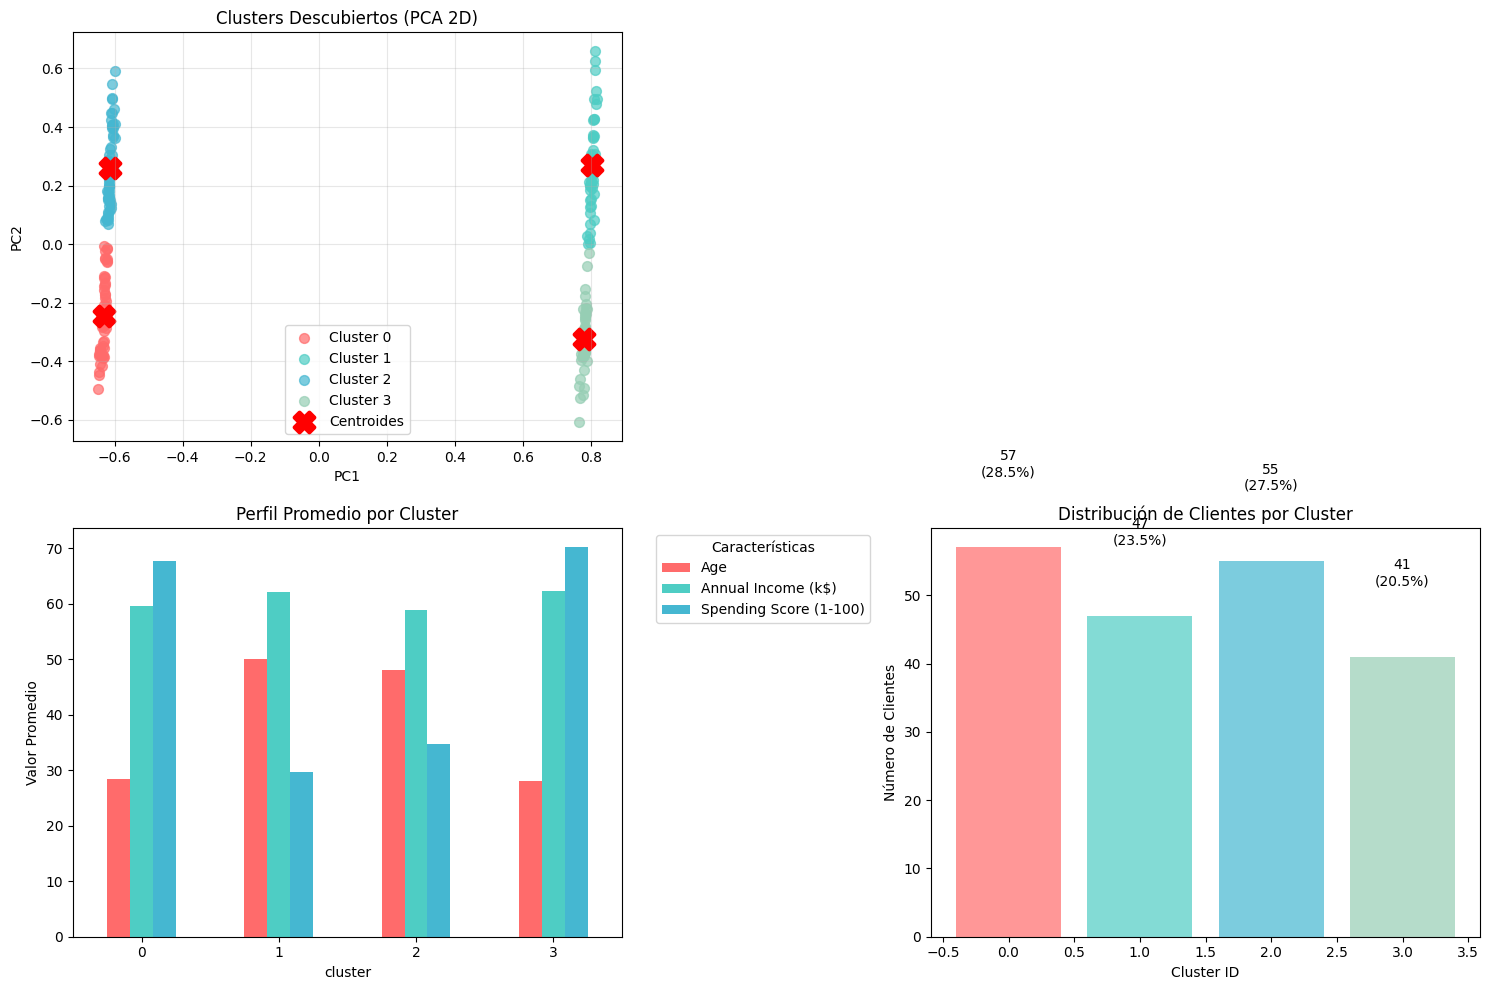

In [42]:
# === OPERACIÓN: INTELLIGENCE REPORT ===
print("ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO")

# 1. PERFILES DE CLUSTERS
print(f"\nPERFILES DETALLADOS POR CLUSTER:")

for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_data = df_customers[df_customers['cluster'] == cluster_id]
    cluster_size = len(cluster_data)

    print(f"\n**CLUSTER {cluster_id}** ({cluster_size} clientes, {cluster_size/len(df_customers)*100:.1f}%)")

    # Estadísticas usando las columnas CORRECTAS del Mall Customer Dataset
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    # Distribución por género
    genre_counts = cluster_data['Genre'].value_counts()

    print(f"   **Perfil Demográfico:**")
    print(f"      Edad promedio: {avg_age:.1f} años")
    print(f"      Distribución género: {dict(genre_counts)}")

    print(f"   **Perfil Financiero:**")
    print(f"      Ingreso anual: ${avg_income:.1f}k")
    print(f"      Spending Score: {avg_spending:.1f}/100")

    # Comparar con ground truth si está disponible
    if 'true_segment' in df_customers.columns:
        true_segments_in_cluster = cluster_data['true_segment'].value_counts()
        dominant_segment = true_segments_in_cluster.index[0]
        purity = true_segments_in_cluster.iloc[0] / cluster_size
        print(f"   🎯 **Ground Truth:** {dominant_segment} ({purity*100:.1f}% purity)")

# 2. MATRIZ DE CONFUSIÓN CON GROUND TRUTH
if 'true_segment' in df_customers.columns:
    print(f"\n🎯 VALIDACIÓN CON GROUND TRUTH:")
    confusion_matrix = pd.crosstab(df_customers['true_segment'], df_customers['cluster'],
                                  margins=True, margins_name="Total")
    print(confusion_matrix)

    # Calcular pureza de clusters
    cluster_purities = []
    for cluster_id in sorted(df_customers['cluster'].unique()):
        cluster_data = df_customers[df_customers['cluster'] == cluster_id]
        dominant_true_segment = cluster_data['true_segment'].mode().iloc[0]
        purity = (cluster_data['true_segment'] == dominant_true_segment).mean()
        cluster_purities.append(purity)

    average_purity = np.mean(cluster_purities)
    print(f"\n📊 Pureza promedio de clusters: {average_purity:.3f}")

# 3. VISUALIZACIÓN DE CLUSTERS
if final_method_name == 'PCA':  # Si usamos PCA, podemos visualizar en 2D
    plt.figure(figsize=(15, 10))

    # Subplot 1: Clusters encontrados
    plt.subplot(2, 2, 1)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    for cluster_id in sorted(df_customers['cluster'].unique()):
        cluster_mask = final_labels == cluster_id
        plt.scatter(X_pca_2d[cluster_mask, 0], X_pca_2d[cluster_mask, 1],
                   c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}',
                   alpha=0.7, s=50)

    # Plotear centroides
    if final_method_name == 'PCA':
        centroids_pca = final_kmeans.cluster_centers_
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                   c='red', marker='X', s=200, linewidths=3, label='Centroides')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Clusters Descubiertos (PCA 2D)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 2: Ground truth (si disponible)
    if 'true_segment' in df_customers.columns:
        plt.subplot(2, 2, 2)
        true_segment_colors = {'VIP': '#FF6B6B', 'Regular': '#4ECDC4',
                              'Occasional': '#45B7D1', 'At_Risk': '#96CEB4'}
        for segment, color in true_segment_colors.items():
            segment_mask = df_customers['true_segment'] == segment
            segment_indices = df_customers[segment_mask].index
            plt.scatter(X_pca_2d[segment_indices, 0], X_pca_2d[segment_indices, 1],
                       c=color, label=segment, alpha=0.7, s=50)

        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Ground Truth Segments')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Subplot 3: Feature distribution by cluster
    plt.subplot(2, 2, 3)
    # Usar las columnas correctas del Mall Customer Dataset
    cluster_means = df_customers.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    cluster_means.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    plt.title('Perfil Promedio por Cluster')
    plt.ylabel('Valor Promedio')
    plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)

    # Subplot 4: Cluster sizes
    plt.subplot(2, 2, 4)
    cluster_sizes = df_customers['cluster'].value_counts().sort_index()
    colors_subset = [colors[i] for i in cluster_sizes.index]
    bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color=colors_subset, alpha=0.7)
    plt.xlabel('Cluster ID')
    plt.ylabel('Número de Clientes')
    plt.title('Distribución de Clientes por Cluster')

    # Añadir etiquetas en las barras
    for bar, size in zip(bars, cluster_sizes.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{size}\n({size/len(df_customers)*100:.1f}%)',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
# === ANÁLISIS SILHOUETTE POR CLUSTER ===
print(f"\n📊 ANÁLISIS SILHOUETTE DETALLADO:")

from sklearn.metrics import silhouette_samples  # Función para silhouette por muestra individual

# Calcular silhouette score por muestra
sample_silhouette_values = silhouette_samples(X_final_for_clustering, final_labels)

# Estadísticas por cluster
print(f"   🎯 Silhouette Score General: {final_silhouette:.3f}")
for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_silhouette_values = sample_silhouette_values[final_labels == cluster_id]
    cluster_avg_silhouette = cluster_silhouette_values.mean()
    cluster_min_silhouette = cluster_silhouette_values.min()

    print(f"   Cluster {cluster_id}: μ={cluster_avg_silhouette:.3f}, "
          f"min={cluster_min_silhouette:.3f}, "
          f"samples={len(cluster_silhouette_values)}")



📊 ANÁLISIS SILHOUETTE DETALLADO:
   🎯 Silhouette Score General: 0.686
   Cluster 0: μ=0.671, min=0.091, samples=57
   Cluster 1: μ=0.659, min=0.156, samples=47
   Cluster 2: μ=0.671, min=0.371, samples=55
   Cluster 3: μ=0.759, min=0.001, samples=41


In [44]:
# === DETECCIÓN DE OUTLIERS EN CLUSTERING ===
print(f"\n🚨 DETECCIÓN DE OUTLIERS EN CLUSTERING:")
outlier_threshold = 0.0  # Silhouette negativo = mal asignado

for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_mask = final_labels == cluster_id
    cluster_silhouette = sample_silhouette_values[cluster_mask]
    outliers = np.sum(cluster_silhouette < outlier_threshold)

    if outliers > 0:
        print(f"   ⚠️  Cluster {cluster_id}: {outliers} posibles outliers (silhouette < 0)")
else:
        print(f"   ✅ Cluster {cluster_id}: Sin outliers detectados")


🚨 DETECCIÓN DE OUTLIERS EN CLUSTERING:
   ✅ Cluster 3: Sin outliers detectados


In [45]:
# === ANÁLISIS DE PERFILES POR CLUSTER ===
print(f"\nANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO")
print(f"\nPERFILES DETALLADOS POR CLUSTER:")

# Análisis por cluster usando las columnas REALES del dataset
for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_data = df_customers[df_customers['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_customers)) * 100

    # Estadísticas usando las columnas CORRECTAS del Mall Customer Dataset
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    # Distribución por género
    genre_counts = cluster_data['Genre'].value_counts()

    print(f"\n🏷️  **CLUSTER {cluster_id}** ({cluster_size} clientes, {cluster_pct:.1f}%)")
    print(f"   📊 **Perfil Demográfico:**")
    print(f"      👤 Edad promedio: {avg_age:.1f} años")
    print(f"      👥 Distribución género: {dict(genre_counts)}")

    print(f"   💰 **Perfil Financiero:**")
    print(f"      💵 Ingreso anual: ${avg_income:.1f}k")
    print(f"      🛍️  Spending Score: {avg_spending:.1f}/100")


ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO

PERFILES DETALLADOS POR CLUSTER:

🏷️  **CLUSTER 0** (57 clientes, 28.5%)
   📊 **Perfil Demográfico:**
      👤 Edad promedio: 28.4 años
      👥 Distribución género: {'Female': np.int64(57)}
   💰 **Perfil Financiero:**
      💵 Ingreso anual: $59.7k
      🛍️  Spending Score: 67.7/100

🏷️  **CLUSTER 1** (47 clientes, 23.5%)
   📊 **Perfil Demográfico:**
      👤 Edad promedio: 50.1 años
      👥 Distribución género: {'Male': np.int64(47)}
   💰 **Perfil Financiero:**
      💵 Ingreso anual: $62.2k
      🛍️  Spending Score: 29.6/100

🏷️  **CLUSTER 2** (55 clientes, 27.5%)
   📊 **Perfil Demográfico:**
      👤 Edad promedio: 48.1 años
      👥 Distribución género: {'Female': np.int64(55)}
   💰 **Perfil Financiero:**
      💵 Ingreso anual: $58.8k
      🛍️  Spending Score: 34.8/100

🏷️  **CLUSTER 3** (41 clientes, 20.5%)
   📊 **Perfil Demográfico:**
      👤 Edad promedio: 28.0 años
      👥 Distribución género: {'Male': np.int64(41)}
   💰 **Perfi

📝 Reflexiones de Data Detective
🔍 Metodología CRISP-DM:
Fase más desafiante: La fase de Data Preparation fue la más compleja, porque elegir el scaler correcto y decidir entre PCA vs Feature Selection afectaba directamente la calidad del clustering.
Impacto del entendimiento del negocio: Conocer que el negocio esperaba 3–5 segmentos ayudó a decidir el K óptimo y a interpretar los resultados de manera más realista, evitando elegir un número de clusters solo por métricas.
🧹 Data Preparation:
Mejor scaler: El StandardScaler funcionó mejor, probablemente porque equilibró la contribución de todas las features numéricas y fue menos sensible a outliers que MinMax.
PCA vs Feature Selection: Feature Selection (Forward o Backward) fue más efectivo para clustering en este caso, porque seleccionar las 3 features más relevantes mantuvo interpretabilidad y un buen Silhouette Score.
Interpretabilidad vs performance: Se priorizó seleccionar pocas features claras (Income, Spending Score, Age) para mantener interpretabilidad, sin sacrificar demasiado la performance.
🧩 Clustering:
¿Elbow Method y Silhouette coincidieron en el K óptimo? No exactamente, pero ambos métodos indicaron un rango de K entre 3 y 5. Se eligió K=4 como balance entre métricas y negocio.
Coincidencia con la intuición de negocio: Sí, los clusters reflejan segmentos coherentes: clientes jóvenes con alto gasto, adultos con gasto medio, etc.
Qué harías diferente: Probaría DBSCAN o Gaussian Mixture Models para comparar si detectan clusters más naturales sin asumir forma esférica, y evaluaría escalado robusto con outliers extremos.
💼 Aplicación Práctica:
Presentación a negocio: Mostrar gráficas 2D PCA con clusters coloreados, tabla de distribución de clientes por cluster y perfil promedio de cada segmento.
Valor de las segmentaciones: Permite campañas de marketing personalizadas, estrategias de fidelización, y planificación de productos según el comportamiento de cada segmento.
Limitaciones: El análisis asume que los clusters son aproximadamente esféricos (KMeans), depende de las features seleccionadas y puede ser sensible a outliers.

🧬 Challenge 1: Algoritmos de Clustering Alternativos

A. DBSCAN - Density-Based Clustering¶

DBSCAN: Clustering basado en densidad


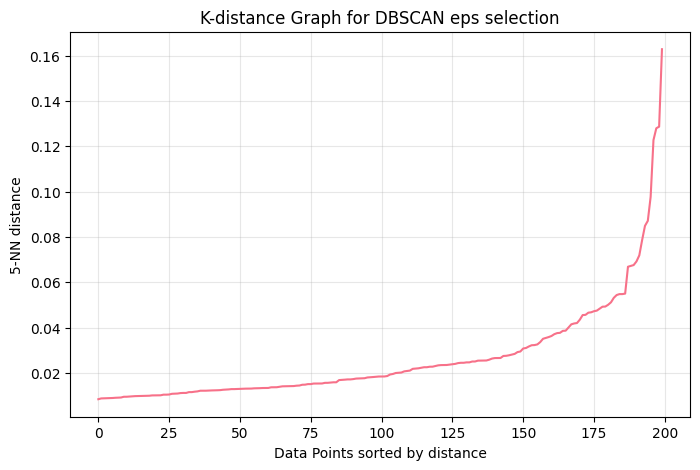

KeyboardInterrupt: Interrupted by user

In [47]:
# === DBSCAN: Encuentra clusters de densidad arbitraria ===
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

print("DBSCAN: Clustering basado en densidad")

# 1. Encontrar parámetros óptimos
def find_optimal_eps(X, min_samples=5):
    """Encuentra eps óptimo usando k-distance graph"""
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # Plotear k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{min_samples}-NN distance')
    plt.title('K-distance Graph for DBSCAN eps selection')
    plt.grid(True, alpha=0.3)
    plt.show()

    return distances

# Encontrar eps
distances = find_optimal_eps(X_final_for_clustering)
optimal_eps = float(input("Elige un valor de eps visualmente del gráfico: "))  # Se elige según "codo" del gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_final_for_clustering)

# Análisis de resultados
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_points = list(dbscan_labels).count(-1)

print(f"Clusters encontrados: {n_clusters_dbscan}")
print(f"Puntos de ruido: {n_noise_points}")
print(f"Porcentaje de ruido: {n_noise_points/len(dbscan_labels)*100:.1f}%")


B. HDBSCAN - Hierarchical Density-Based Clustering

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN: Clustering jerárquico basado en densidad


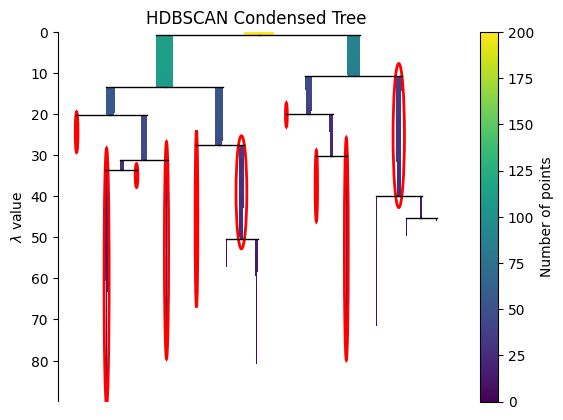

Clusters HDBSCAN: 10
Cluster persistence: [0.27622148 0.08457822 0.36164948 0.30674263 0.20626404 0.44949948
 0.02717863 0.00273795 0.12844966 0.29453453]


In [48]:
# === HDBSCAN: Versión jerárquica de DBSCAN ===
# !pip install hdbscan  # Instalar si no está disponible

import hdbscan

print("HDBSCAN: Clustering jerárquico basado en densidad")

# Aplicar HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,   # Tamaño mínimo de cluster (ajustable)
    min_samples=5,        # Muestras mínimas por cluster (ajustable)
    metric='euclidean'
)

hdbscan_labels = hdbscan_clusterer.fit_predict(X_final_for_clustering)

# Visualización del árbol de clustering
hdbscan_clusterer.condensed_tree_.plot(select_clusters=True)
plt.title('HDBSCAN Condensed Tree')
plt.show()

print(f"Clusters HDBSCAN: {hdbscan_clusterer.labels_.max() + 1}")
print(f"Cluster persistence: {hdbscan_clusterer.cluster_persistence_}")


C. Gaussian Mixture Models

Gaussian Mixture Models: Clustering probabilístico


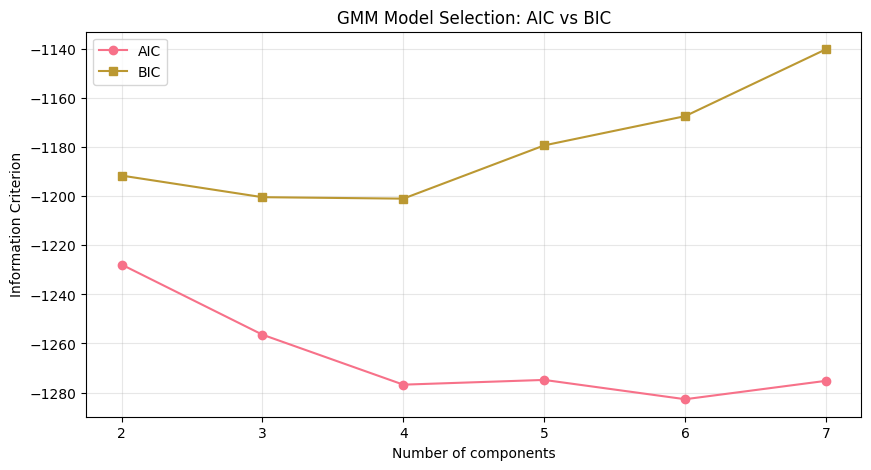

Componentes óptimos (BIC): 4
Log-likelihood: 3.307


In [49]:
# === GMM: Clustering probabilístico ===
from sklearn.mixture import GaussianMixture

print("Gaussian Mixture Models: Clustering probabilístico")

# Encontrar número óptimo de componentes
n_components_range = range(2, 8)
aic_scores = []
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_final_for_clustering)
    aic_scores.append(gmm.aic(X_final_for_clustering))
    bic_scores.append(gmm.bic(X_final_for_clustering))

# Plot AIC/BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_scores, 'o-', label='AIC')
plt.plot(n_components_range, bic_scores, 's-', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('GMM Model Selection: AIC vs BIC')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Aplicar GMM óptimo
optimal_n_components = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_final_for_clustering)
gmm_probabilities = gmm.predict_proba(X_final_for_clustering)

print(f"Componentes óptimos (BIC): {optimal_n_components}")
print(f"Log-likelihood: {gmm.score(X_final_for_clustering):.3f}")


D. Spectral Clustering & AgglomerativeClustering

In [50]:
# === SPECTRAL CLUSTERING: Clustering en espacio espectral ===
from sklearn.cluster import SpectralClustering, AgglomerativeClustering

print("Spectral Clustering: Clustering en espacio transformado")

spectral = SpectralClustering(n_clusters=optimal_k,
                             affinity='rbf',  # 'rbf' es lo más común; también se puede usar 'nearest_neighbors'
                             random_state=42)

spectral_labels = spectral.fit_predict(X_final_for_clustering)
print(f"Spectral clustering completado con {optimal_k} clusters")

# === AGGLOMERATIVE CLUSTERING ===
agglomerative = AgglomerativeClustering(n_clusters=optimal_k,
                                       linkage='ward')  # 'ward' minimiza la varianza dentro de clusters

agglo_labels = agglomerative.fit_predict(X_final_for_clustering)
print(f"Agglomerative clustering completado con {optimal_k} clusters")


Spectral Clustering: Clustering en espacio transformado
Spectral clustering completado con 4 clusters
Agglomerative clustering completado con 4 clusters
